# China Dataset - Effort Estimation
Fang Hon Yun. (2010). China: Effort Estimation Dataset (Dataset). Zenodo. http://doi.org/10.5281/zenodo.268446

The goal of the project is to develop an effective effort estimation model achieving best possible accuracy level, optimizing software projects by estimating efforts for the same using machine learning techniques.

## Contents
- Import Libraries
- Data Description
- Data Cleaning
- EDA
- Feature Engineering
- Feature Selection
- Modeling and Evaluation

## Import Libraries

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor

In [3]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

In [4]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor

In [5]:
ch_data = arff.loadarff('china.arff')
ch = pd.DataFrame(ch_data[0])
ch.to_csv('china.csv', index=False)
ch = pd.read_csv('china.csv')

In [6]:
ch.shape

(499, 19)

## Data Description

In [7]:
ch.head()

,ID,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Dev.Type,Duration,N_effort,Effort
0,1.0,1587.0,774.0,260.0,340.0,128.0,0.0,1502.0,0.0,0.0,4.7,5.0,4.7,5.0,4.0,0.0,4.0,7490.0,7490.0
1,2.0,260.0,9.0,4.0,3.0,193.0,41.0,51.0,138.0,61.0,16.0,16.6,16.0,16.6,2.0,0.0,17.0,4150.0,4150.0
2,3.0,152.0,25.0,33.0,28.0,42.0,35.0,163.0,0.0,0.0,4.4,4.1,4.4,4.1,1.0,0.0,9.0,668.0,668.0
3,4.0,252.0,151.0,28.0,8.0,39.0,0.0,69.0,153.0,4.0,12.8,14.3,15.5,17.3,1.0,0.0,4.0,3901.0,3238.0
4,5.0,292.0,93.0,0.0,194.0,20.0,0.0,0.0,307.0,0.0,10.3,9.8,12.4,11.7,1.0,0.0,13.0,3607.0,2994.0


In [8]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         499 non-null    float64
 1   AFP        499 non-null    float64
 2   Input      499 non-null    float64
 3   Output     499 non-null    float64
 4   Enquiry    499 non-null    float64
 5   File       499 non-null    float64
 6   Interface  499 non-null    float64
 7   Added      499 non-null    float64
 8   Changed    499 non-null    float64
 9   Deleted    499 non-null    float64
 10  PDR_AFP    499 non-null    float64
 11  PDR_UFP    499 non-null    float64
 12  NPDR_AFP   499 non-null    float64
 13  NPDU_UFP   499 non-null    float64
 14  Resource   499 non-null    float64
 15  Dev.Type   499 non-null    float64
 16  Duration   499 non-null    float64
 17  N_effort   499 non-null    float64
 18  Effort     499 non-null    float64
dtypes: float64(19)
memory usage: 74.1 KB


In [9]:
ch.columns

Index(['ID', 'AFP', 'Input', 'Output', 'Enquiry', 'File', 'Interface', 'Added',
       'Changed', 'Deleted', 'PDR_AFP', 'PDR_UFP', 'NPDR_AFP', 'NPDU_UFP',
       'Resource', 'Dev.Type', 'Duration', 'N_effort', 'Effort'],
      dtype='object')

In [10]:
ch.describe()

,ID,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Dev.Type,Duration,N_effort,Effort
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.00000,499.000000,499.000000,499.000000,499.0,499.000000,499.000000,499.000000
mean,250.000000,486.857715,167.098196,113.601202,61.601202,91.234469,24.234469,360.354709,85.062124,12.352705,11.770541,12.07976,13.269739,13.626253,1.458918,0.0,8.719238,4277.641283,3921.048096
std,144.193157,1059.171436,486.338575,221.274374,105.422840,210.270984,85.040996,829.842333,290.857039,124.224130,12.105649,12.81871,14.009840,14.843416,0.823729,0.0,7.347058,7071.248036,6480.855600
min,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.30000,0.400000,0.400000,1.000000,0.0,1.000000,31.000000,26.000000
25%,125.500000,100.500000,27.000000,13.000000,6.000000,14.000000,0.000000,38.000000,0.000000,0.000000,4.300000,4.20000,4.600000,4.400000,1.000000,0.0,4.000000,776.000000,703.500000
50%,250.000000,215.000000,63.000000,42.000000,24.000000,36.000000,0.000000,135.000000,4.000000,0.000000,8.100000,8.00000,8.800000,8.900000,1.000000,0.0,7.000000,2098.000000,1829.000000
75%,374.500000,437.500000,152.500000,112.000000,68.500000,84.000000,20.000000,325.500000,87.000000,0.000000,15.400000,15.75000,16.350000,16.900000,2.000000,0.0,11.000000,4192.000000,3826.500000
max,499.000000,17518.000000,9404.000000,2455.000000,952.000000,2955.000000,1572.000000,13580.000000,5193.000000,2657.000000,83.800000,96.60000,101.000000,108.300000,4.000000,0.0,84.000000,54620.000000,54620.000000


## Data Cleaning

In [11]:
ch.isnull().sum()

ID           0
AFP          0
Input        0
Output       0
Enquiry      0
File         0
Interface    0
Added        0
Changed      0
Deleted      0
PDR_AFP      0
PDR_UFP      0
NPDR_AFP     0
NPDU_UFP     0
Resource     0
Dev.Type     0
Duration     0
N_effort     0
Effort       0
dtype: int64

In [12]:
ch.drop(['ID', 'Dev.Type'], axis=1, inplace=True)

In [13]:
ch.to_csv('china_clean.csv', index=False)

## EDA

In [14]:
ch.corr()

,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Duration,N_effort,Effort
AFP,1.000000,0.929968,0.712668,0.488186,0.914711,0.402819,0.933307,0.313342,0.180308,-0.141567,-0.124103,-0.147505,-0.130600,0.157851,0.351080,0.643094,0.684644
Input,0.929968,1.000000,0.471630,0.338585,0.812958,0.159086,0.902650,0.129327,0.194728,-0.119653,-0.108345,-0.122576,-0.111771,0.096166,0.253619,0.540412,0.576267
Output,0.712668,0.471630,1.000000,0.431812,0.589836,0.539109,0.593967,0.511991,0.195015,-0.164323,-0.151550,-0.174400,-0.161873,0.190396,0.373034,0.525389,0.564053
Enquiry,0.488186,0.338585,0.431812,1.000000,0.467315,0.164118,0.513084,0.164468,0.034152,-0.109120,-0.088858,-0.113128,-0.092163,0.154634,0.426826,0.503129,0.510449
File,0.914711,0.812958,0.589836,0.467315,1.000000,0.455158,0.879229,0.300210,0.057897,-0.138626,-0.124668,-0.146662,-0.133399,0.208208,0.335603,0.566580,0.611860
Interface,0.402819,0.159086,0.539109,0.164118,0.455158,1.000000,0.223323,0.647125,0.170389,-0.051519,-0.046778,-0.056329,-0.051488,0.164663,0.251573,0.316237,0.328860
Added,0.933307,0.902650,0.593967,0.513084,0.879229,0.223323,1.000000,-0.001258,-0.008810,-0.125874,-0.113052,-0.134173,-0.121637,0.212892,0.409417,0.650475,0.691276
Changed,0.313342,0.129327,0.511991,0.164468,0.300210,0.647125,-0.001258,1.000000,0.176053,-0.099152,-0.089730,-0.097166,-0.088205,-0.035295,0.012611,0.101163,0.114581
Deleted,0.180308,0.194728,0.195015,0.034152,0.057897,0.170389,-0.008810,0.176053,1.000000,-0.050647,-0.047277,-0.049546,-0.046098,-0.027508,-0.004613,0.071905,0.068668
PDR_AFP,-0.141567,-0.119653,-0.164323,-0.109120,-0.138626,-0.051519,-0.125874,-0.099152,-0.050647,1.000000,0.990834,0.982724,0.974804,-0.044353,0.053981,0.248735,0.235013


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

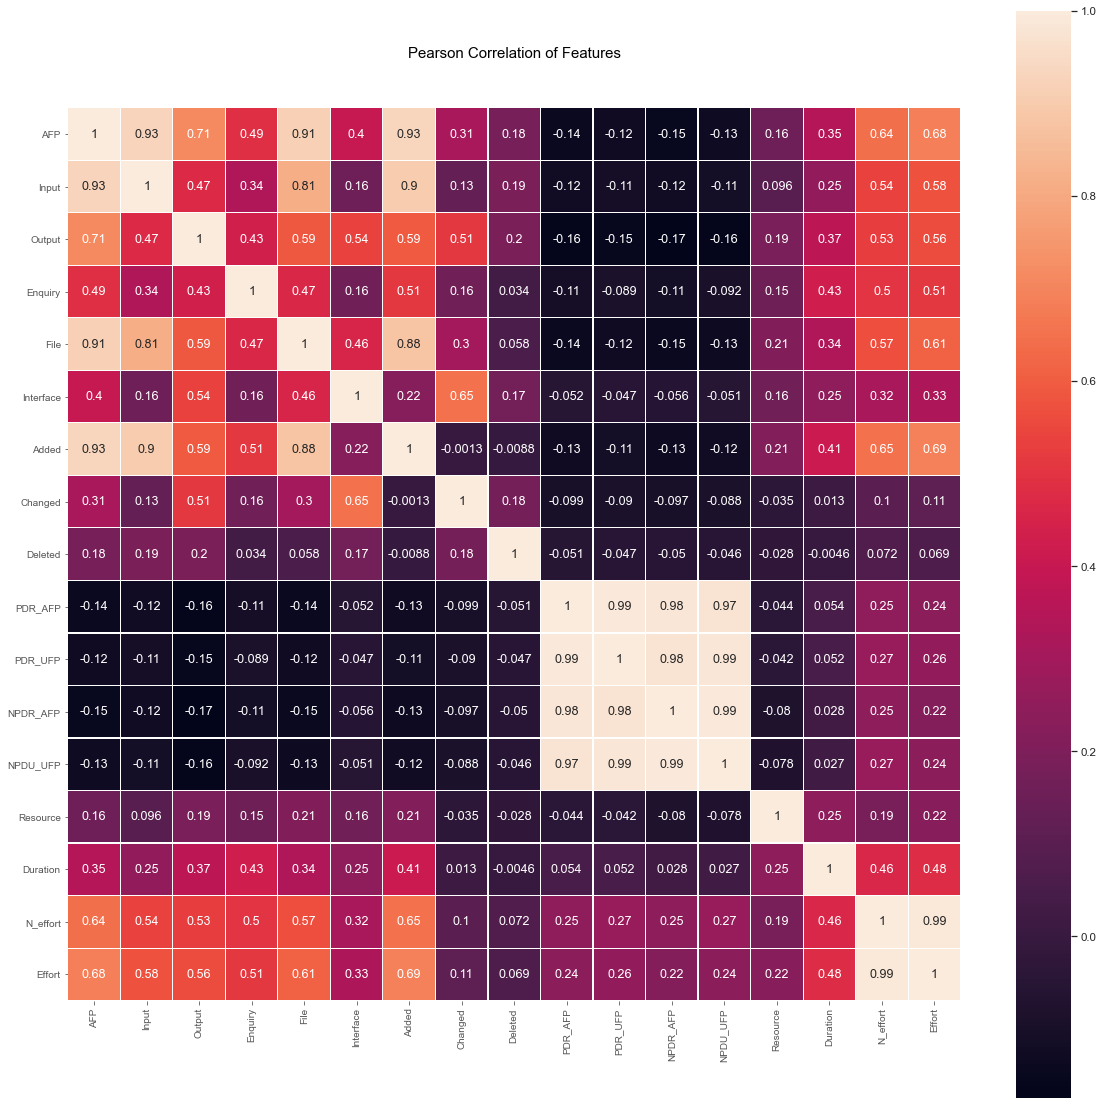

In [15]:
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(ch.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

## Feature Engineering

### Log Transformation on skewed features

In [16]:
ch2 = ch.copy()

In [17]:
cols = ['AFP', 'Input', 'Output', 'Enquiry', 'File', 'Interface', 'Added',
       'Changed', 'Deleted', 'PDR_AFP', 'PDR_UFP', 'NPDR_AFP', 'NPDU_UFP',
       'Resource', 'Duration', 'N_effort']
for col in cols:
    if(ch2[col].skew()>2.0):
        ch2[col] = np.log1p(ch2[col])
    

In [18]:
ch2.shape

(499, 17)

In [19]:
ch2.head()

,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Duration,N_effort,Effort
0,7.370231,6.652863,5.564520,5.831882,4.859812,0.000000,7.315218,0.000000,0.000000,1.740466,1.791759,1.740466,1.791759,4.0,1.609438,8.921458,7490.0
1,5.564520,2.302585,1.609438,1.386294,5.267858,3.737670,3.951244,4.934474,4.127134,2.833213,2.867899,2.833213,2.867899,2.0,2.890372,8.331105,4150.0
2,5.030438,3.258097,3.526361,3.367296,3.761200,3.583519,5.099866,0.000000,0.000000,1.686399,1.629241,1.686399,1.629241,1.0,2.302585,6.505784,668.0
3,5.533389,5.023881,3.367296,2.197225,3.688879,0.000000,4.248495,5.036953,1.609438,2.624669,2.727853,2.803360,2.906901,1.0,1.609438,8.269245,3238.0
4,5.680173,4.543295,0.000000,5.273000,3.044522,0.000000,0.000000,5.730100,0.000000,2.424803,2.379546,2.595255,2.541602,1.0,2.639057,8.190909,2994.0


##### Use Robust Scaler

In [20]:
scaler = RobustScaler()
minmax = MinMaxScaler()

In [21]:
X2 = ch2.drop(['Effort', 'N_effort'], axis=1)
y2 = ch2['Effort']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [22]:
X2_train_sc = scaler.fit_transform(X2_train)
X2_test_sc = scaler.fit_transform(X2_test)

## Feature Selection

In [23]:
lasso = Lasso(max_iter=2000)
lasso.fit(X2_train_sc, y2_train)

Lasso(max_iter=2000)

In [24]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X2.columns)

In [25]:
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
AFP,8083.399115
PDR_UFP,3662.782571
NPDU_UFP,1959.206696
Resource,273.801742
NPDR_AFP,0.000000
Output,-137.061408
File,-139.455991
Input,-172.642879
Deleted,-197.889437
Duration,-409.454897


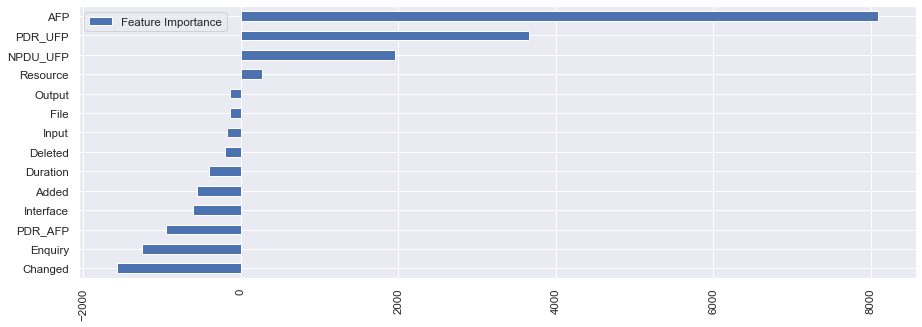

In [26]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,5))
plt.xticks(rotation=90)
plt.show()

##### Mutual Info Regression

In [27]:
X_mir = ch.drop(['Effort', 'N_effort'], axis=1)
y_mir = ch['Effort']

mutual_info = mutual_info_regression(X_mir, y_mir)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_mir.columns
mutual_info.sort_values(ascending=False)

AFP          0.290279
PDR_AFP      0.235923
Added        0.219147
NPDU_UFP     0.213580
PDR_UFP      0.207456
Enquiry      0.197291
NPDR_AFP     0.190948
Input        0.190423
Duration     0.157571
File         0.140139
Changed      0.093862
Output       0.091235
Resource     0.035201
Deleted      0.020627
Interface    0.011537
dtype: float64

<AxesSubplot:>

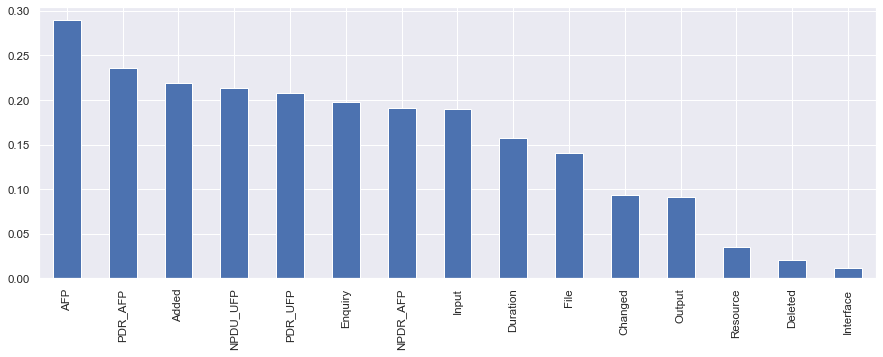

In [28]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [29]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=30)
selected_top_columns.fit(X_mir, y_mir)
X_mir.columns[selected_top_columns.get_support()]

Index(['AFP', 'Added', 'PDR_AFP', 'PDR_UFP', 'NPDU_UFP'], dtype='object')

In [30]:
features = ['AFP', 'PDR_UFP', 'NPDU_UFP', 'Resource', 'Added', 'PDR_AFP']

## Modeling and Evaluation

In [31]:
def mae(model, X, y):
    mae = (-cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=3))
    return mae

def rmse(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=3))
    return rmse

def r2(model, X, y):
    r2 = (cross_val_score(model, X, y, scoring='r2', cv=3))
    return r2

Models with 3-fold cross-validation

- Linear Regression
- Lasso Regression
- Ridge Regression
- Elastic Net
- SGD Regressor
- SVR
- K-Neighbors
- Decision Tree
- Gradient Boosting
- Random Forest
- MLP

In [32]:
X2 = ch2[features]
y2 = ch2['Effort']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [33]:
X2_train_sc = scaler.fit_transform(X2_train)
X2_test_sc = scaler.fit_transform(X2_test)

In [34]:
models = [LinearRegression(), Lasso(max_iter=5000), Ridge(), ElasticNet(), SGDRegressor(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), GradientBoostingRegressor(), RandomForestRegressor(), ExtraTreesRegressor(), MLPRegressor(hidden_layer_sizes=(6,6), max_iter=5000)]

In [40]:
names = ['LR', 'LasR', 'RR', 'EN', 'SGD', 'SVR', 'KN', 'DT', 'GB', 'RF', 'ET', 'MLP']
for name, model in zip(names, models):
    score = (mae(model, X2_train_sc, y2_train), rmse(model, X2_train_sc, y2_train), r2(model, X2_train_sc, y2_train))
    print('{}: {:.6f}, {:.6f}, {:.4f}, {}'.format(name, score[0].mean(), score[1].mean(), score[2].mean(), score[1].std()))

LR: 2807.607433, 4197.388120, 0.5840, 1226.0729474729794
LasR: 2804.605426, 4193.830492, 0.5848, 1225.0673918160244
RR: 2788.309199, 4178.265794, 0.5886, 1237.416814098276
EN: 2547.640847, 4538.745245, 0.5259, 1665.4868409002763
SGD: 2794.375264, 4173.470458, 0.5887, 1234.694066284339
SVR: 3290.624922, 6829.287099, -0.1183, 1745.1030934396067
KN: 1260.861654, 3298.634638, 0.7529, 1571.217935329575
DT: 1489.746867, 3253.022093, 0.7397, 859.7163060435873
GB: 1060.847051, 2771.670926, 0.8003, 1026.683594831105
RF: 1080.330301, 2970.984056, 0.7773, 1283.697369927001
ET: 694.067644, 2125.364818, 0.8895, 1531.9369771150327


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optim

MLP: 1677.221639, 3038.337051, 0.7830, 793.4939923742439


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Hyperparameter tuning using GridSearchCV

In [63]:
def grid(model, param_grid):
    grid = GridSearchCV(model, param_grid, cv=5, verbose=3, n_jobs=-1)
    grid.fit(X2_train_sc, y2_train)
    print('Best Parameters: {}'.format(grid.best_params_))
    print('Best Estimator: {}'.format(grid.best_estimator_))
    grid_predictions = grid.predict(X2_test_sc)
    pred_score = (metrics.mean_absolute_error(y2_test, grid_predictions), np.sqrt(metrics.mean_squared_error(y2_test, grid_predictions)), metrics.r2_score(y2_test, grid_predictions)) 
    print('Predictions: MAE: {:.6f}, RMSE: {:.6f}, R2_Score: {:.4f}'.format(pred_score[0], pred_score[1], pred_score[2]))
    
    fig = plt.figure(figsize=(12, 6))
    plt.scatter(y2_test, grid_predictions)
    plt.xlabel('Effort') 
    plt.ylabel('Predictions') 
    plt.grid()
    plt.show()

### K-Neighbors Tuning

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best Estimator: KNeighborsRegressor(n_neighbors=7, weights='distance')
Predictions: MAE: 683.637835, RMSE: 2433.012875, R2_Score: 0.8031


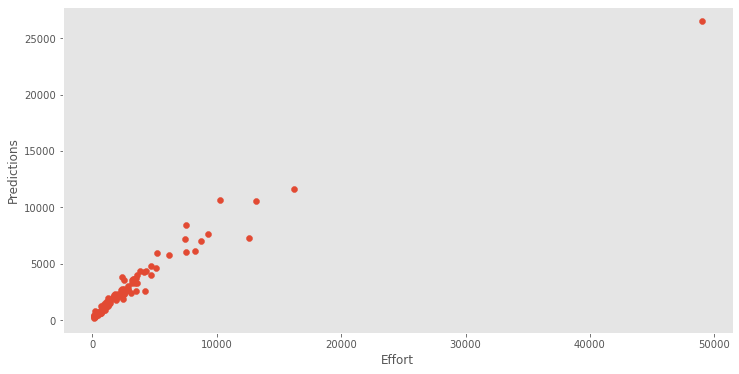

In [187]:
kn_param_grid = {'n_neighbors':[3,5,7,9,10],
                'weights':['uniform', 'distance']}

grid(KNeighborsRegressor(), kn_param_grid)

### Decision Tree Tuning

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'criterion': 'mae', 'max_features': 'auto', 'splitter': 'best'}
Best Estimator: DecisionTreeRegressor(criterion='mae', max_features='auto')
Predictions: MAE: 791.410000, RMSE: 2317.587036, R2_Score: 0.8213


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


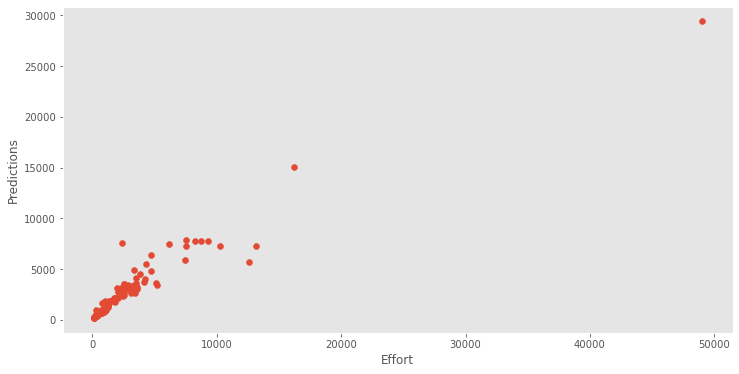

In [168]:
dt_param_grid = {'criterion':['mse', 'mae'],
                'max_features':['auto'],
                'splitter':['best', 'random']}

grid(DecisionTreeRegressor(), dt_param_grid)

### Gradient Boosting Tuning

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    4.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    5.1s finished


Best Parameters: {'alpha': 0.5, 'criterion': 'mae', 'loss': 'ls', 'max_features': 'auto', 'n_estimators': 100}
Best Estimator: GradientBoostingRegressor(alpha=0.5, criterion='mae', max_features='auto')
Predictions: MAE: 640.742675, RMSE: 2044.848331, R2_Score: 0.8609


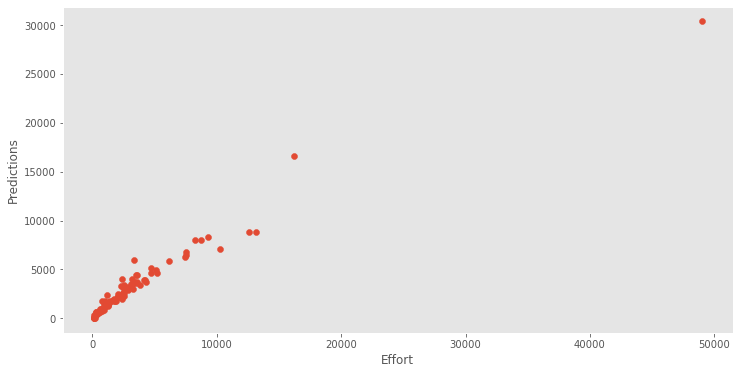

In [171]:
gb_param_grid = {'loss':['ls', 'lad'],
                'n_estimators':[70,100],
                'criterion':['mse', 'mae'],
                'max_features':['auto'],
                'alpha':[0.5,0.9,2]}

grid(GradientBoostingRegressor(), gb_param_grid)

### Random Forest Tuning

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.1s finished


Best Parameters: {'criterion': 'mae', 'n_estimators': 70}
Best Estimator: RandomForestRegressor(criterion='mae', n_estimators=70)
Predictions: MAE: 574.574500, RMSE: 2117.680240, R2_Score: 0.8508


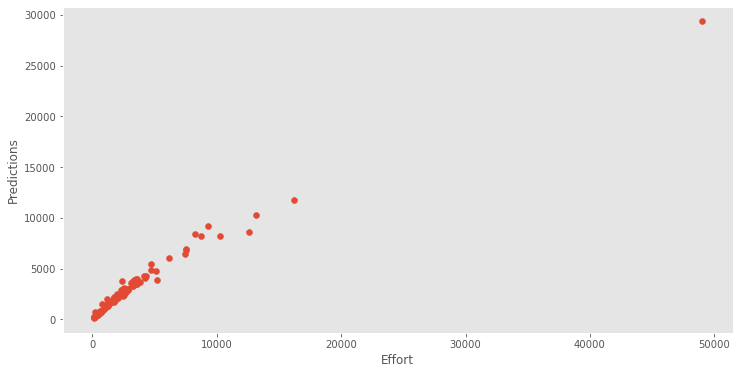

In [173]:
rf_param_grid = {'n_estimators':[40,70,100],
                'criterion':['mae', 'mse']}

grid(RandomForestRegressor(), rf_param_grid)

### Extra Trees Tuning

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.0s finished


Best Parameters: {'criterion': 'mse', 'n_estimators': 70}
Best Estimator: ExtraTreesRegressor(n_estimators=70)
Predictions: MAE: 496.977429, RMSE: 1948.142841, R2_Score: 0.8737


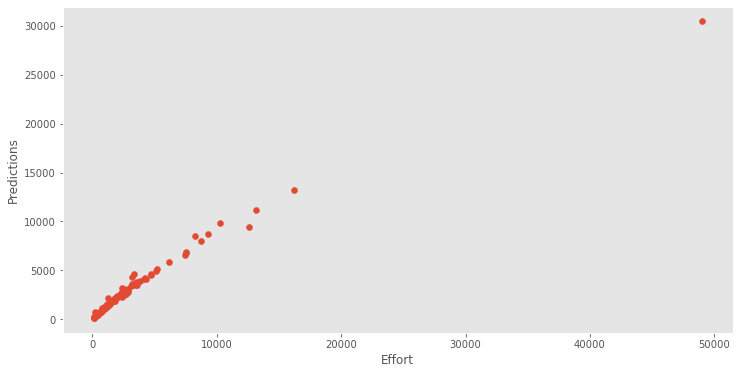

In [184]:
et_param_grid = {'n_estimators':[20,50,70,100],
                'criterion':['mae', 'mse']}

grid(ExtraTreesRegressor(), et_param_grid)

### MLP Tuning

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  4.8min finished


Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'early_stopping': False, 'hidden_layer_sizes': (6, 6), 'learning_rate': 'constant', 'max_iter': 5000, 'solver': 'lbfgs'}
Best Estimator: MLPRegressor(alpha=0.001, hidden_layer_sizes=(6, 6), max_iter=5000,
             solver='lbfgs')
Predictions: MAE: 366.698218, RMSE: 1156.688445, R2_Score: 0.9555


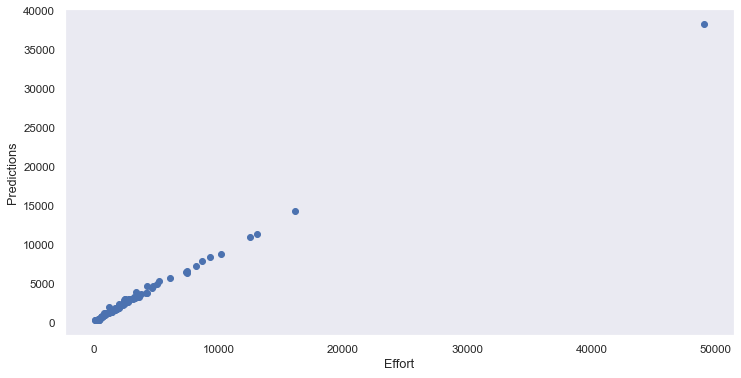

In [44]:
mlp_param_grid = {'hidden_layer_sizes':[(6,6)],
                 'activation':['relu'],
                 'solver':['lbfgs', 'adam'],
                 'alpha':[0.0001,0.001,0.01],
                 'max_iter':[2000, 5000],
                 'early_stopping':[True]}

grid(MLPRegressor(), mlp_param_grid)

## Ensemble Methods

In [37]:
kn = KNeighborsRegressor(n_neighbors=7, weights='distance')
dt = DecisionTreeRegressor(criterion='mae', max_features='auto')
gb = GradientBoostingRegressor(alpha=0.5, criterion='mae', max_features='auto')
rf = RandomForestRegressor(criterion='mae', n_estimators=70)
et = ExtraTreesRegressor(n_estimators=70)
mlp = MLPRegressor(alpha=0.001, hidden_layer_sizes=(6, 6), max_iter=5000, solver='lbfgs')

### Bagging

In [50]:
estimators = [kn, dt, gb, rf, et, mlp]
es_names = ['KNeighbors', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'Extra Trees', 'MLP']
for name, estimator in zip(es_names, estimators):
    print('Bagging with base regressor: {}'.format(name))
    bag = BaggingRegressor(base_estimator=estimator)
    bag.fit(X2_train_sc, y2_train)
    bag_predict = bag.predict(X2_test_sc)
    bag_score = (metrics.mean_absolute_error(y2_test, bag_predict), np.sqrt(metrics.mean_squared_error(y2_test, bag_predict)), metrics.r2_score(y2_test, bag_predict))
    print('Predictions: MAE: {:.6f}, RMSE: {:.6f}, R2_Score: {:.4f}\n'.format(bag_score[0], bag_score[1], bag_score[2]))

Bagging with base regressor: KNeighbors
Predictions: MAE: 704.630814, RMSE: 2417.877497, R2_Score: 0.8055

Bagging with base regressor: Decision Tree
Predictions: MAE: 559.924000, RMSE: 1878.942332, R2_Score: 0.8825

Bagging with base regressor: Gradient Boosting
Predictions: MAE: 582.828799, RMSE: 1925.776844, R2_Score: 0.8766

Bagging with base regressor: Random Forest
Predictions: MAE: 649.034243, RMSE: 2089.413609, R2_Score: 0.8548

Bagging with base regressor: Extra Trees
Predictions: MAE: 515.246500, RMSE: 2017.578641, R2_Score: 0.8646

Bagging with base regressor: MLP
Predictions: MAE: 383.479604, RMSE: 1378.124072, R2_Score: 0.9368



### AdaBoost

In [44]:
def boost(model, param_grid):
    boost = GridSearchCV(model, param_grid, cv=5, verbose=3, n_jobs=-1)
    boost.fit(X2_train_sc, y2_train)
    print('Best Parameters: {}'.format(boost.best_params_))
    print('Best Estimator: {}'.format(boost.best_estimator_))
    boost_predictions = boost.predict(X2_test_sc)
    boost_score = (metrics.mean_absolute_error(y2_test, boost_predictions), np.sqrt(metrics.mean_squared_error(y2_test, boost_predictions)), metrics.r2_score(y2_test, boost_predictions)) 
    print('Predictions: MAE: {:.6f}, RMSE: {:.6f}, R2_Score: {:.4f}\n'.format(boost_score[0], boost_score[1], boost_score[2]))

In [45]:
estimators = [kn, dt, gb, rf, et, mlp]
es_names = ['KNeighbors', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'Extra Trees', 'MLP']
for name, estimator in zip(es_names, estimators):
    ab_param_grid = {'base_estimator':[estimator],
                'n_estimators':[50,70],
                'loss':['linear', 'square']}
    print('AdaBoost with base regressor: {}'.format(name))
    boost(AdaBoostRegressor(), ab_param_grid)

AdaBoost with base regressor: KNeighbors
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    3.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.8s finished


Best Parameters: {'base_estimator': KNeighborsRegressor(n_neighbors=7, weights='distance'), 'loss': 'linear', 'n_estimators': 70}
Best Estimator: AdaBoostRegressor(base_estimator=KNeighborsRegressor(n_neighbors=7,
                                                     weights='distance'),
                  n_estimators=70)
Predictions: MAE: 843.409547, RMSE: 1813.536007, R2_Score: 0.8906

AdaBoost with base regressor: Decision Tree
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    1.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.8s finished


Best Parameters: {'base_estimator': DecisionTreeRegressor(criterion='mae', max_features='auto'), 'loss': 'linear', 'n_estimators': 50}
Best Estimator: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mae',
                                                       max_features='auto'))
Predictions: MAE: 801.170000, RMSE: 2378.800750, R2_Score: 0.8117

AdaBoost with base regressor: Gradient Boosting
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:  1.6min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.1min finished


Best Parameters: {'base_estimator': GradientBoostingRegressor(alpha=0.5, criterion='mae', max_features='auto'), 'loss': 'linear', 'n_estimators': 70}
Best Estimator: AdaBoostRegressor(base_estimator=GradientBoostingRegressor(alpha=0.5,
                                                           criterion='mae',
                                                           max_features='auto'),
                  n_estimators=70)
Predictions: MAE: 740.237124, RMSE: 1870.145038, R2_Score: 0.8836

AdaBoost with base regressor: Random Forest
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:  1.4min remaining:   55.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.8min finished


Best Parameters: {'base_estimator': RandomForestRegressor(criterion='mae', n_estimators=70), 'loss': 'linear', 'n_estimators': 50}
Best Estimator: AdaBoostRegressor(base_estimator=RandomForestRegressor(criterion='mae',
                                                       n_estimators=70))
Predictions: MAE: 795.772929, RMSE: 2068.641987, R2_Score: 0.8576

AdaBoost with base regressor: Extra Trees
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:   21.4s remaining:   14.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   28.7s finished


Best Parameters: {'base_estimator': ExtraTreesRegressor(n_estimators=70), 'loss': 'linear', 'n_estimators': 50}
Best Estimator: AdaBoostRegressor(base_estimator=ExtraTreesRegressor(n_estimators=70))
Predictions: MAE: 611.473143, RMSE: 1993.631795, R2_Score: 0.8678

AdaBoost with base regressor: MLP
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:  3.8min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.7min finished
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs"

Best Parameters: {'base_estimator': MLPRegressor(alpha=0.001, hidden_layer_sizes=(6, 6), max_iter=5000,
             solver='lbfgs'), 'loss': 'linear', 'n_estimators': 50}
Best Estimator: AdaBoostRegressor(base_estimator=MLPRegressor(alpha=0.001,
                                              hidden_layer_sizes=(6, 6),
                                              max_iter=5000, solver='lbfgs'))
Predictions: MAE: 301.097590, RMSE: 1159.505385, R2_Score: 0.9553



### Stacking

In [52]:
stack_estimators = [('rf', rf), ('et', et), ('gb', gb)]

stack = StackingRegressor(estimators=stack_estimators, final_estimator=mlp, cv=5)

In [53]:
stack.fit(X2_train_sc, y2_train)

StackingRegressor(cv=5,
                  estimators=[('rf',
                               RandomForestRegressor(criterion='mae',
                                                     n_estimators=70)),
                              ('et', ExtraTreesRegressor(n_estimators=70)),
                              ('gb',
                               GradientBoostingRegressor(alpha=0.5,
                                                         criterion='mae',
                                                         max_features='auto'))],
                  final_estimator=MLPRegressor(alpha=0.001,
                                               hidden_layer_sizes=(6, 6),
                                               max_iter=5000, solver='lbfgs'))

In [54]:
stack_predictions = stack.predict(X2_test_sc)
stack_score = (metrics.mean_absolute_error(y2_test, stack_predictions), np.sqrt(metrics.mean_squared_error(y2_test, stack_predictions)), metrics.r2_score(y2_test, stack_predictions)) 
print('Predictions: MAE: {:.6f}, RMSE: {:.6f}, R2_Score: {:.4f}\n'.format(stack_score[0], stack_score[1], stack_score[2]))

Predictions: MAE: 516.276706, RMSE: 1586.201059, R2_Score: 0.9163

